# INTRODUCTION

In this project, the Breast Tissue Measurements dataset is being explored and analyzed through various stages of data analysis and clustering techniques. The project is structured into multiple notebooks, each focusing on different aspects and methodologies to provide a comprehensive understanding of the dataset and to derive meaningful insights.

## Previous Notebooks

1. **Exploratory Data Analysis (EDA)**:
   - This notebook focused on understanding the dataset's structure, distributions, and relationships between variables through detailed analysis and visualizations.
   - [Link to EDA Notebook](https://www.kaggle.com/code/tarktunataalt/exploring-breast-tissue-data-eda-insights)

2. **PCA and Distance Analysis**:
   - In this notebook, Principal Component Analysis (PCA) was applied to reduce the dimensionality of the dataset, and the appropriate distance metrics for clustering were determined.
   - [Link to PCA and Distance Analysis Notebook](https://www.kaggle.com/code/tarktunataalt/breast-tissue-pca-distance-analysis)

## Current Notebook

This notebook aims to apply the K-Means clustering algorithm to the dataset and determine the optimal number of clusters. The steps involved include:
- Using the Elbow Method, Silhouette Method, and Gap Statistic to evaluate the appropriate number of clusters.
- Visualizing the clustering results with different numbers of clusters.
- Analyzing the clustering solutions to identify the most meaningful and robust clustering configuration.

Based on the analyses, it has been concluded that K-Means clustering with k=4 will be evaluated further, despite some overlapping between clusters. The k=6  solution, however, will be excluded due to the presence of an outlier forming a single-point cluster, which is not meaningful for clustering analysis.

**Note:** The `factoextra` library, which is essential for some visualizations and analyses, is not available on Kaggle. Therefore, the code for these parts was executed locally and the results were uploaded. Those who wish to run the code themselves are advised to download and run it on their local machines.


## Future Notebooks

The subsequent notebooks will delve into various clustering techniques using the identified optimal settings:

1. **K-Medoids Clustering**:
   - Implementing the K-Medoids algorithm and comparing its performance with K-Means.

2. **Hierarchical Clustering**:
   - Performing hierarchical clustering and visualizing the dendrogram to understand the clustering hierarchy.

3. **Hierarchical K-Means Clustering**:
   - Combining hierarchical clustering with K-Means to refine clusters for improved results.

4. **Model-Based Clustering**:
   - Using Gaussian Mixture Models (GMM) and other model-based techniques to analyze the data under different assumptions.

5. **Density-Based Clustering**:
   - Exploring density-based methods like DBSCAN to identify clusters based on data density.

6. **Selecting the Optimal Clustering Method**:
   - Comparing the results of different clustering techniques and using cluster validation metrics to select the best method.

Each notebook will build on the findings of the previous ones, ensuring a systematic and thorough analysis of the Breast Tissue Measurements dataset.







In [8]:
library(factoextra)
library(gridExtra)


data <- read.csv("/kaggle/input/breast-tissue-impedance-measurements/data.csv")
data <- data[,2:10]


In [9]:
scaled_pca_data <- prcomp(data, center = TRUE, scale. = TRUE)
scaled_pca_data <- scaled_pca_data$x[,1:2]

# OPTIMAL NUMBER OF CLUSTERS FOR K-MEANS

## Elbow Method

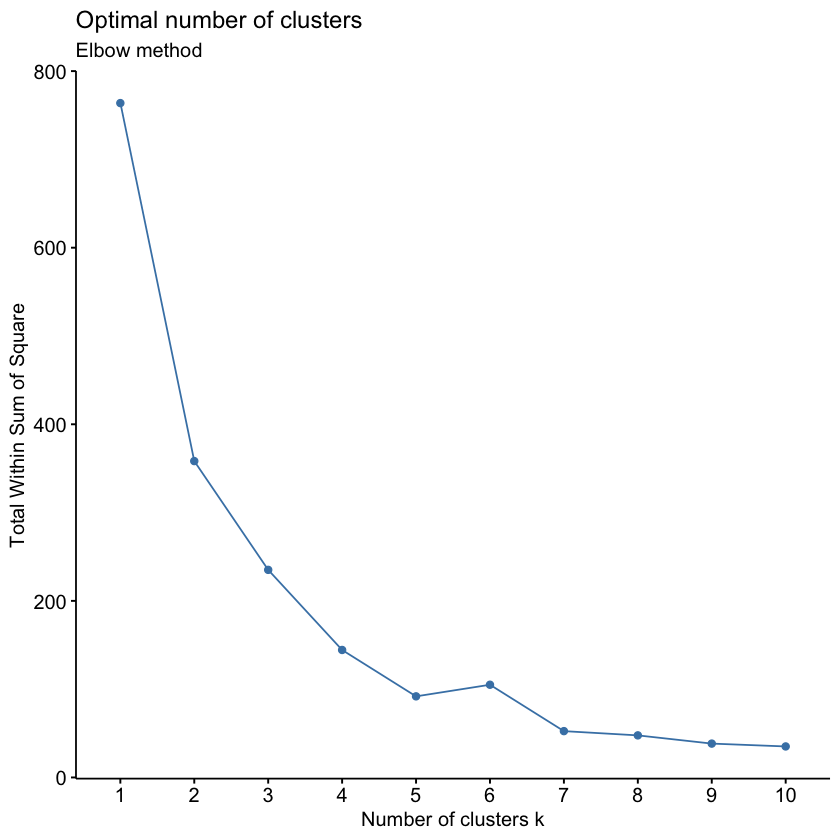

In [10]:
fviz_nbclust(scaled_pca_data,kmeans,method = "wss",nstart = 25)+
  labs(subtitle = "Elbow method")

The Elbow Method plots the Total Within Sum of Squares (WSS) against the number of clusters (k) to find the point where the rate of decrease slows, forming an "elbow."

In the plot, the WSS decreases significantly from 1 to 3 clusters, then more gradually. However, a clear "elbow" is not evident, making it difficult to determine the optimal number of clusters. Therefore, additional methods like the Silhouette Method or Gap Statistic are needed to provide more clarity for this dataset.

## Silhouette Method

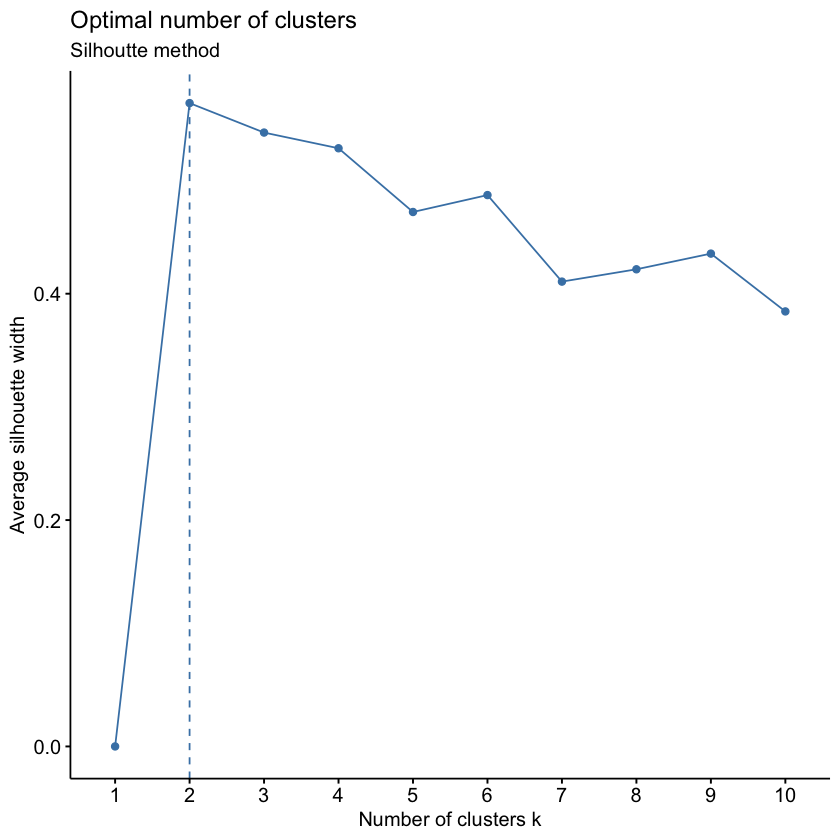

In [11]:
fviz_nbclust(scaled_pca_data,kmeans,method = "silhouette")+ #for average silhouette width
  labs(subtitle = "Silhoutte method")

The Silhouette Method measures how well each point lies within its cluster. In the plot, the silhouette width peaks at 2 clusters but this can often be misleadingly high. More attention should be given to the values for 3, 4, and 6 clusters, which also show relatively high silhouette widths and may provide better clustering solutions for this dataset. Therefore, while 2 clusters can be noted, 3, 4, and 6 clusters are recommended for further analysis.

## Gap Statistic Method

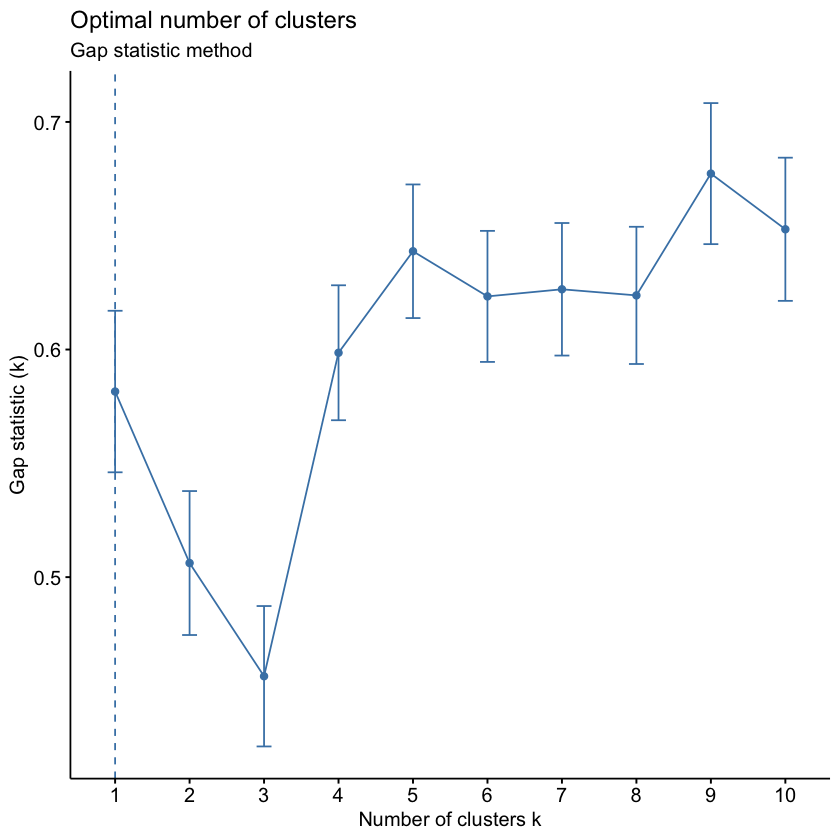

In [12]:
fviz_nbclust(scaled_pca_data, kmeans, nstart = 25,  method = "gap_stat", nboot = 500)+
  labs(subtitle = "Gap statistic method")

The Gap Statistic Method helps to determine the optimal number of clusters by comparing the total within intra-cluster variation for different numbers of clusters with their expected values under null reference distribution.

In the attached plot, it is observed that for cluster numbers greater than 4, the Gap statistic values are relatively high and stable. This indicates that any number of clusters greater than 4 could be used effectively. Therefore, according to this graph, cluster numbers greater than 4 are considered feasible for clustering analysis.

## General Conclusion

Determining the optimal number of clusters for K-Means clustering involves evaluating multiple methods. 

- **Elbow Method**: No distinct elbow point was observed, making it challenging to identify the optimal number of clusters from this plot.
- **Silhouette Method**: Suggested cluster numbers were 2 (questionable), 3, 4, and 6.
- **Gap Statistic Method**: Indicated that cluster numbers 4, 5, 6, 7, 8, 9, and 10 are feasible.

Given the overlap in recommendations from the Silhouette and Gap methods, clusters 4 and 6 will be further evaluated in the K-Means clustering analysis. This approach aims to ensure the selection of well-defined and meaningful clusters for the dataset.

# K-MEANS

## FOR 4 CLUSTERS


Warning message in MASS::cov.trob(data[, vars]):

“Probable convergence failure”


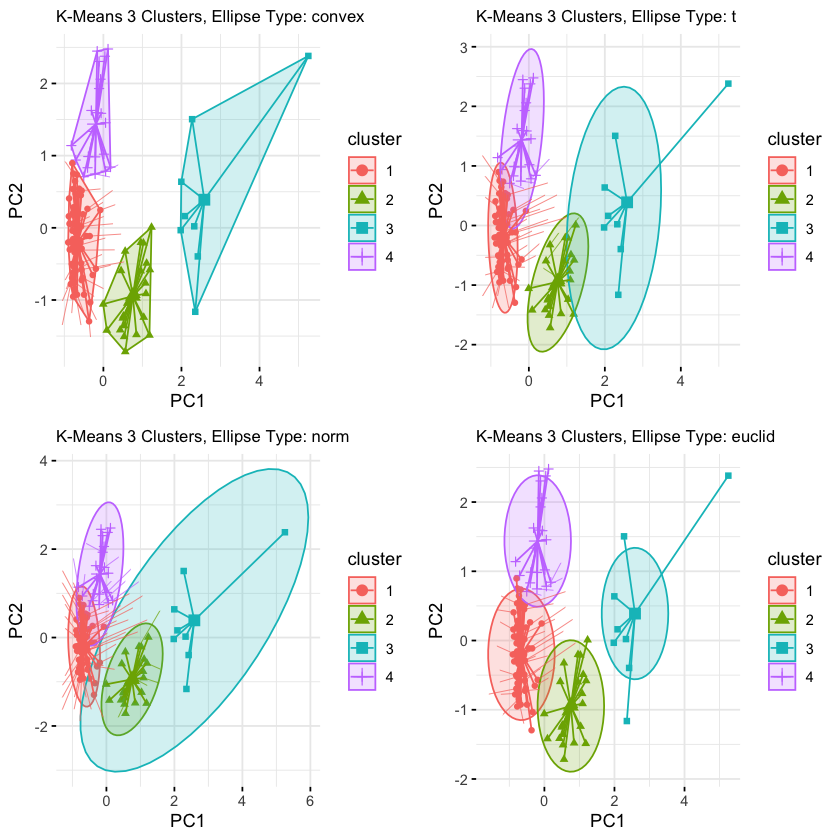

In [13]:
km_res_4 <- kmeans(scaled_pca_data, 4, nstart=25) 
ellipse_types <- c("convex", "t", "norm", "euclid")
k_4plots <- list()

for (etype in ellipse_types) {
  p <- fviz_cluster(km_res_4, data = scaled_pca_data,
                    ellipse.type = etype, 
                    star.plot = TRUE, 
                    repel = TRUE, 
                    labelsize = 0, 
                    ggtheme = theme_minimal()
  ) + labs(title = paste("K-Means 3 Clusters, Ellipse Type:", etype)) +
      theme(plot.title = element_text(size = 10))
  k_4plots[[etype]] <- p
}

grid.arrange(grobs = k_4plots, ncol = 2)

The plots display the K-Means clustering results with 4 clusters using different types of ellipses (convex, t, norm, and euclid) to visualize the cluster boundaries. 

It can be observed that there are some overlaps between clusters, indicating that the clusters are not perfectly separated. Despite these overlaps, a reasonable level of separation is achieved, making the clustering moderately effective in distinguishing different groups within the data.

These visualizations suggest that while the clusters are not completely distinct, the overall separation is acceptable for further analysis.

## FOR 6 CLUSTERS


Too few points to calculate an ellipse

Too few points to calculate an ellipse

Too few points to calculate an ellipse


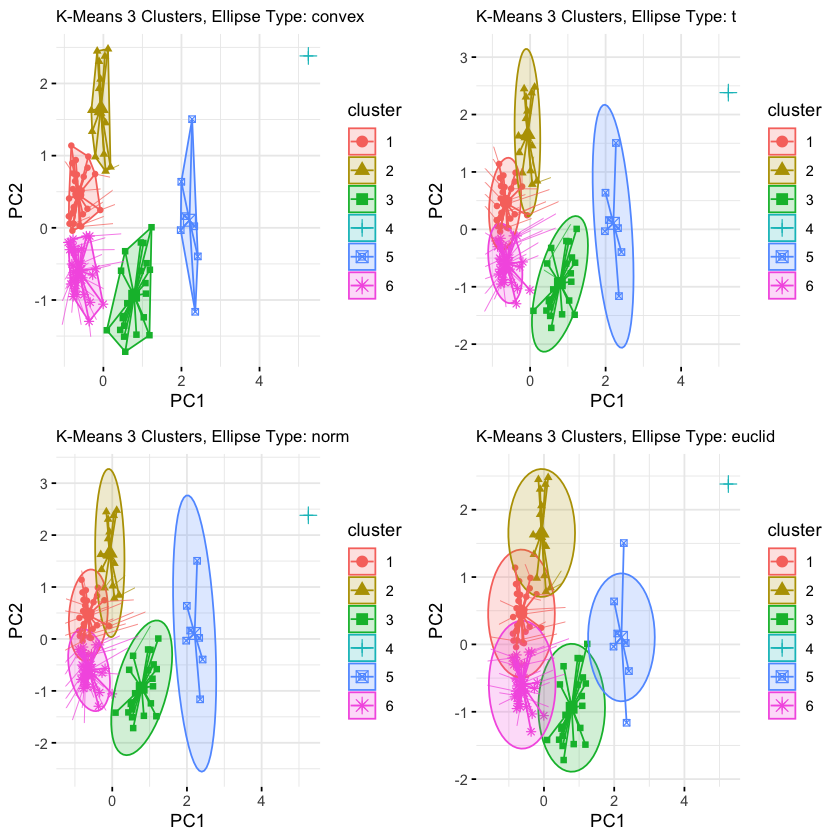

In [14]:
km_res_6 <- kmeans(scaled_pca_data, 6, nstart=25) 
ellipse_types <- c("convex", "t", "norm", "euclid")
k_6plots <- list()

for (etype in ellipse_types) {
  p <- fviz_cluster(km_res_6, data = scaled_pca_data,
                    ellipse.type = etype, 
                    star.plot = TRUE, 
                    repel = TRUE, 
                    labelsize = 0, 
                    ggtheme = theme_minimal()
  ) + labs(title = paste("K-Means 3 Clusters, Ellipse Type:", etype)) +
      theme(plot.title = element_text(size = 10))
  k_6plots[[etype]] <- p
}

grid.arrange(grobs = k_6plots, ncol = 2)

The plots display the K-Means clustering results with 6 clusters using different types of ellipses (convex, t, norm, and euclid) to visualize the cluster boundaries.

It can be observed that the observation numbered 103 forms its own separate cluster. This indicates that it is an outlier, resulting in a cluster with a single data point. Such a cluster is not considered a meaningful cluster in the context of clustering analysis. Therefore, the use of 6 clusters in the K-Means algorithm is not feasible for this dataset, as it does not provide a robust or practical clustering solution.

# CONCLUSION

Based on the analyses conducted, it has been determined that the K-Means clustering with k=4 will be evaluated further in the results notebook. Although there is some overlapping between clusters in the k=4  solution, it is still considered a viable option supported by the overlapping recommendations from the Silhouette and Gap Statistic methods. However, the K-Means clustering with  k=6  will be completely excluded from further evaluation. The presence of a cluster containing only a single outlier (observation 103) in the k=6 clustering solution indicates that it is not a viable or meaningful approach for this dataset.